<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/MODELsandSTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn imbalanced-learn matplotlib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

df = pd.read_excel('/content/Final_dataset.xlsx')

X_text = df.iloc[:, 0]
X_numerical = df.iloc[:, 1:-1]
y = df['Label']


In [ ]:
import pandas as pd


text_column = df.iloc[:, 0]         # The text data (first column)
features = df.iloc[:, 1:12]         # 11 numerical features (columns 1 to 11)
labels = df.iloc[:, -1]             # The label (last column)

print(features.columns)
print(df.info())


Index(['PM Ratio', 'FPSP Ratio', 'Review Length', 'RW Ratio', 'Sentiment',
       'Generalization', 'Passive Voice', 'Total reviewer reviews',
       'Account type', 'Useful votes ', 'Attached Medias'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21476 entries, 0 to 21475
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_text             21476 non-null  object 
 1   PM Ratio                21476 non-null  float64
 2   FPSP Ratio              21476 non-null  float64
 3   Review Length           21476 non-null  int64  
 4   RW Ratio                21476 non-null  float64
 5   Sentiment               21476 non-null  float64
 6   Generalization          21476 non-null  float64
 7   Passive Voice           21476 non-null  float64
 8   Total reviewer reviews  21476 non-null  int64  
 9   Account type            21476 non-null  int64  
 10  Useful votes            2

In [ ]:
# Manually select a subset of the 11 numerical features by column names or indices
selected_features = ['Review Length','Total reviewer reviews','RW Ratio','Account type']

# Extract the subset of selected features
subset_features = features[selected_features]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Train-test split for text data and labels
X_train_text, X_test_text, y_train, y_test = train_test_split(text_column, labels, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to the text data
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

# Train-test split for the selected subset of numerical features
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(subset_features, labels, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_num_resampled, y_train_num_resampled = smote.fit_resample(X_train_num, y_train_num)


In [ ]:
from scipy.sparse import hstack

# Combine TF-IDF features and selected numerical features for training and testing
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

# Apply SMOTE on the combined feature set
X_train_combined_resampled, y_train_combined_resampled = smote.fit_resample(X_train_combined, y_train_num)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Train a Logistic Regression model on the combined features
model_combined = LogisticRegression(max_iter=1000)
model_combined.fit(X_train_combined_resampled, y_train_combined_resampled)

# Make predictions on the test set
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model
print("Results for combined TF-IDF and selected numerical features:")
print(confusion_matrix(y_test_num, y_pred_combined))
print(classification_report(y_test_num, y_pred_combined))


Results for combined TF-IDF and selected numerical features:
[[1945  546]
 [ 388 1417]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2491
           1       0.72      0.79      0.75      1805

    accuracy                           0.78      4296
   macro avg       0.78      0.78      0.78      4296
weighted avg       0.79      0.78      0.78      4296



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train_text, X_test_text, y_train, y_test = train_test_split(text_column, labels, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

In [ ]:
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf_resampled, y_train_resampled)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("Results for TF-IDF features alone:")
print(confusion_matrix(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


Results for TF-IDF features alone:
[[1713  778]
 [ 685 1120]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2491
           1       0.59      0.62      0.60      1805

    accuracy                           0.66      4296
   macro avg       0.65      0.65      0.65      4296
weighted avg       0.66      0.66      0.66      4296



In [ ]:
# Train-test split for numerical features and labels
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(features, labels, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance for the numerical features
X_train_num_resampled, y_train_num_resampled = smote.fit_resample(X_train_num, y_train_num)

# Train Logistic Regression on numerical features
model_num = LogisticRegression(max_iter=1000)
model_num.fit(X_train_num_resampled, y_train_num_resampled)

# Make predictions on the test set
y_pred_num = model_num.predict(X_test_num)

# Evaluate the model using confusion matrix and classification report
print("Results for numerical features alone:")
print(confusion_matrix(y_test_num, y_pred_num))
print(classification_report(y_test_num, y_pred_num))


Results for numerical features alone:
[[2082  409]
 [ 257 1548]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2491
           1       0.79      0.86      0.82      1805

    accuracy                           0.84      4296
   macro avg       0.84      0.85      0.84      4296
weighted avg       0.85      0.84      0.85      4296



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for TF-IDF features
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tfidf)
plt.title("Confusion Matrix for TF-IDF Features")
plt.show()

# Confusion matrix for numerical features
ConfusionMatrixDisplay.from_predictions(y_test_num, y_pred_num)
plt.title("Confusion Matrix for Numerical Features")
plt.show()


NameError: name 'y_pred_tfidf' is not defined

In [ ]:
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

X_train_combined_resampled, y_train_combined_resampled = smote.fit_resample(X_train_combined, y_train_num)

model_combined = LogisticRegression(max_iter=1000)
model_combined.fit(X_train_combined_resampled, y_train_combined_resampled)

y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model
print("Results for combined TF-IDF and numerical features:")
print(confusion_matrix(y_test_num, y_pred_combined))
print(classification_report(y_test_num, y_pred_combined))


Results for combined TF-IDF and numerical features:
[[2124  367]
 [ 258 1547]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2491
           1       0.81      0.86      0.83      1805

    accuracy                           0.85      4296
   macro avg       0.85      0.85      0.85      4296
weighted avg       0.86      0.85      0.86      4296



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.svm import SVC

# Train SVM on TF-IDF features
model_svm_tfidf = SVC(kernel='linear', random_state=42)
model_svm_tfidf.fit(X_train_tfidf_resampled, y_train_resampled)

# Predictions
y_pred_svm_tfidf = model_svm_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("Results for SVM on TF-IDF features:")
print(confusion_matrix(y_test, y_pred_svm_tfidf))
print(classification_report(y_test, y_pred_svm_tfidf))

# Train SVM on numerical features
model_svm_num = SVC(kernel='linear', random_state=42)
model_svm_num.fit(X_train_num_resampled, y_train_num_resampled)

# Predictions
y_pred_svm_num = model_svm_num.predict(X_test_num)

# Evaluate the model
print("Results for SVM on numerical features:")
print(confusion_matrix(y_test_num, y_pred_svm_num))
print(classification_report(y_test_num, y_pred_svm_num))


Results for SVM on TF-IDF features:
[[1648  843]
 [ 650 1155]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2491
           1       0.58      0.64      0.61      1805

    accuracy                           0.65      4296
   macro avg       0.65      0.65      0.65      4296
weighted avg       0.66      0.65      0.65      4296

Results for SVM on numerical features:
[[2091  400]
 [ 247 1558]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2491
           1       0.80      0.86      0.83      1805

    accuracy                           0.85      4296
   macro avg       0.85      0.85      0.85      4296
weighted avg       0.85      0.85      0.85      4296



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf_tfidf = RandomForestClassifier(random_state=42)
model_rf_tfidf.fit(X_train_tfidf_resampled, y_train_resampled)

y_pred_rf_tfidf = model_rf_tfidf.predict(X_test_tfidf)

print("Results for Random Forest on TF-IDF features:")
print(confusion_matrix(y_test, y_pred_rf_tfidf))
print(classification_report(y_test, y_pred_rf_tfidf))

# Train Random Forest on numerical features
model_rf_num = RandomForestClassifier(random_state=42)
model_rf_num.fit(X_train_num_resampled, y_train_num_resampled)

# Predictions
y_pred_rf_num = model_rf_num.predict(X_test_num)

# Evaluate the model
print("Results for Random Forest on numerical features:")
print(confusion_matrix(y_test_num, y_pred_rf_num))
print(classification_report(y_test_num, y_pred_rf_num))


Results for Random Forest on TF-IDF features:
[[1905  586]
 [ 854  951]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      2491
           1       0.62      0.53      0.57      1805

    accuracy                           0.66      4296
   macro avg       0.65      0.65      0.65      4296
weighted avg       0.66      0.66      0.66      4296

Results for Random Forest on numerical features:
[[2466   25]
 [  47 1758]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2491
           1       0.99      0.97      0.98      1805

    accuracy                           0.98      4296
   macro avg       0.98      0.98      0.98      4296
weighted avg       0.98      0.98      0.98      4296



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Test diffrent models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(kernel='linear')),
    ('Naive Bayes', GaussianNB()),
]

# Iterate over models and compare
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2491
           1       0.84      0.82      0.83      1805

    accuracy                           0.86      4296
   macro avg       0.85      0.85      0.85      4296
weighted avg       0.86      0.86      0.86      4296

--------------------------------------------------
Results for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2491
           1       0.99      0.97      0.98      1805

    accuracy                           0.98      4296
   macro avg       0.98      0.98      0.98      4296
weighted avg       0.98      0.98      0.98      4296

--------------------------------------------------
Results for SVM:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2491
           1       0.85      0.82      0.83      1805

   

===========================================================
NEW START TO TRY MODELS
===========================================================


In [ ]:
pip install pandas scikit-learn imbalanced-learn matplotlib


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/Final_dataset.xlsx')

# Assuming the columns are: text, 11 features, and label
text_column = df.iloc[:, 0]         # Text data (1st column)
features = df.iloc[:, 1:12]         # 11 numerical features (next 11 columns)
labels = df.iloc[:, -1]             # Label (last column)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split for text data and labels
X_train_text, X_test_text, y_train, y_test = train_test_split(text_column, labels, test_size=0.2, random_state=42)

# Apply TF-IDF vectorization to the text data
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)


In [ ]:
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class in the training set for numerical features
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train_num_resampled, y_train_num_resampled = smote.fit_resample(X_train_num, y_train_num)

# Combine TF-IDF features and numerical features
from scipy.sparse import hstack
X_train_combined = hstack([X_train_tfidf, X_train_num])
X_test_combined = hstack([X_test_tfidf, X_test_num])

# Apply SMOTE on the combined feature set
X_train_combined_resampled, y_train_combined_resampled = smote.fit_resample(X_train_combined, y_train_num)


In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test, model_name, models):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)

        # Calculate metrics
        metrics = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': metrics['weighted avg']['precision'],
            'Recall': metrics['weighted avg']['recall'],
            'F1-Score': metrics['weighted avg']['f1-score']
        })

        # Display confusion matrix
        print(f"Confusion Matrix for {name} ({model_name}):")
        print(confusion_matrix(y_test, y_pred))

    # Create and display results in a table
    return pd.DataFrame(results)

# Models to evaluate
models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier()
}


In [ ]:
print("Evaluation for Numerical Features Only:")
numerical_results = evaluate_models(X_train_num_resampled, X_test_num, y_train_num_resampled, y_test_num, "Numerical", models)
print(numerical_results)


Evaluation for Numerical Features Only:
Confusion Matrix for KNN (Numerical):
[[1715  776]
 [ 466 1339]]
Confusion Matrix for Naive Bayes (Numerical):
[[1587  904]
 [ 291 1514]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression (Numerical):
[[2082  409]
 [ 257 1548]]
Confusion Matrix for SVM (Numerical):
[[2091  400]
 [ 247 1558]]
Confusion Matrix for Random Forest (Numerical):
[[2461   30]
 [  54 1751]]
                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.710894   0.721952  0.710894  0.712734
1          Naive Bayes  0.721834   0.753071  0.721834  0.722509
2  Logistic Regression  0.844972   0.848479  0.844972  0.845665
3                  SVM  0.849395   0.852908  0.849395  0.850071
4        Random Forest  0.980447   0.980473  0.980447  0.980428


In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test, model_name, models):
    results = []

    # Convert X_train and X_test to dense if they are sparse
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)

        # Calculate metrics
        metrics = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': metrics['weighted avg']['precision'],
            'Recall': metrics['weighted avg']['recall'],
            'F1-Score': metrics['weighted avg']['f1-score']
        })

        # Display confusion matrix
        print(f"Confusion Matrix for {name} ({model_name}):")
        print(confusion_matrix(y_test, y_pred))

    # Create and display results in a table
    return pd.DataFrame(results)


In [ ]:
print("Evaluation for TF-IDF Features Only:")
tfidf_results = evaluate_models(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF", models)
print(tfidf_results)
..

Evaluation for TF-IDF Features Only:
Confusion Matrix for KNN (TF-IDF):
[[1130 1361]
 [ 529 1276]]
Confusion Matrix for Naive Bayes (TF-IDF):
[[ 655 1836]
 [ 281 1524]]
Confusion Matrix for Logistic Regression (TF-IDF):
[[2004  487]
 [ 902  903]]
Confusion Matrix for SVM (TF-IDF):
[[1944  547]
 [ 892  913]]
Confusion Matrix for Random Forest (TF-IDF):
[[2086  405]
 [1006  799]]
                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.560056   0.598257  0.560056  0.557157
1          Naive Bayes  0.507216   0.596337  0.507216  0.469596
2  Logistic Regression  0.676676   0.672815  0.676676  0.668109
3                  SVM  0.665037   0.660208  0.665037  0.658187
4        Random Forest  0.671555   0.670013  0.671555  0.656432


In [ ]:
print("Evaluation for Combined TF-IDF and Numerical Features:")
combined_results = evaluate_models(X_train_combined_resampled, X_test_combined, y_train_combined_resampled, y_test_num, "Combined", models)
print(combined_results)


Evaluation for Combined TF-IDF and Numerical Features:
Confusion Matrix for KNN (Combined):
[[1631  860]
 [ 417 1388]]
Confusion Matrix for Naive Bayes (Combined):
[[1104 1387]
 [ 499 1306]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression (Combined):
[[2123  368]
 [ 260 1545]]
Confusion Matrix for SVM (Combined):
[[2130  361]
 [ 264 1541]]
Confusion Matrix for Random Forest (Combined):
[[2387  104]
 [ 304 1501]]
                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.702747   0.721200  0.702747  0.704486
1          Naive Bayes  0.560987   0.603102  0.560987  0.556711
2  Logistic Regression  0.853818   0.855911  0.853818  0.854321
3                  SVM  0.854516   0.856311  0.854516  0.854975
4        Random Forest  0.905028   0.907271  0.905028  0.904076


In [ ]:
print("Evaluation for Combined TF-IDF and Numerical Features:")
combined_results = evaluate_models(X_train_combined_resampled, X_test_combined, y_train_combined_resampled, y_test_num, "Combined", models)
print(combined_results)

Evaluation for Combined TF-IDF and Numerical Features:
Confusion Matrix for KNN (Combined):
[[1631  860]
 [ 417 1388]]
Confusion Matrix for Naive Bayes (Combined):
[[1104 1387]
 [ 499 1306]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression (Combined):
[[2123  368]
 [ 260 1545]]
Confusion Matrix for SVM (Combined):
[[2130  361]
 [ 264 1541]]
Confusion Matrix for Random Forest (Combined):
[[2395   96]
 [ 314 1491]]
                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.702747   0.721200  0.702747  0.704486
1          Naive Bayes  0.560987   0.603102  0.560987  0.556711
2  Logistic Regression  0.853818   0.855911  0.853818  0.854321
3                  SVM  0.854516   0.856311  0.854516  0.854975
4        Random Forest  0.904562   0.907375  0.904562  0.903496


In [ ]:
# Combine results from all scenarios
combined_results_df = pd.concat([
    numerical_results.assign(Scenario='Numerical Features'),
    tfidf_results.assign(Scenario='TF-IDF Features'),
    combined_results.assign(Scenario='Combined Features')
])

# Display results in a table
print(combined_results_df)

# Save the results to a CSV file if needed
combined_results_df.to_csv('model_comparison_results.csv', index=False)


                 Model  Accuracy  Precision    Recall  F1-Score  \
0                  KNN  0.710894   0.721952  0.710894  0.712734   
1          Naive Bayes  0.721834   0.753071  0.721834  0.722509   
2  Logistic Regression  0.844972   0.848479  0.844972  0.845665   
3                  SVM  0.849395   0.852908  0.849395  0.850071   
4        Random Forest  0.980447   0.980473  0.980447  0.980428   
0                  KNN  0.560056   0.598257  0.560056  0.557157   
1          Naive Bayes  0.507216   0.596337  0.507216  0.469596   
2  Logistic Regression  0.676676   0.672815  0.676676  0.668109   
3                  SVM  0.665037   0.660208  0.665037  0.658187   
4        Random Forest  0.671555   0.670013  0.671555  0.656432   
0                  KNN  0.702747   0.721200  0.702747  0.704486   
1          Naive Bayes  0.560987   0.603102  0.560987  0.556711   
2  Logistic Regression  0.853818   0.855911  0.853818  0.854321   
3                  SVM  0.854516   0.856311  0.854516  0.85497

In [ ]:
import pandas as pd

# Load the dataset (replace 'a.xlsx' with your actual file)
df = pd.read_excel('/content/Final_dataset.xlsx')

# Assuming 'feature_a' is the column for which you want to find the maximum value
# and 'label' is the class column
# Modify the column names if necessary to match your dataset

# Group by the 'label' (class) column and find the max value for 'feature_a'
max_feature_a_by_class = df.groupby('Label')['Review Length'].max()

# Display the maximum values for each class
print(max_feature_a_by_class)


Label
0    676
1    772
Name: Review Length, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset (replace 'a.xlsx' with your actual file)
df = pd.read_excel('/content/Final_dataset.xlsx')

# Assuming 'feature_a' is the column for which you want to find the maximum value
# and 'label' is the class column
# Modify the column names if necessary to match your dataset

# Group by the 'label' (class) column and find the max value for 'feature_a'
max_feature_a_by_class = df.groupby('Label')['PM Ratio'].max()

# Display the maximum values for each class
print(max_feature_a_by_class)


Label
0    0.322581
1    0.292683
Name: PM Ratio, dtype: float64


In [ ]:
import pandas as pd

# Load the dataset (replace 'a.xlsx' with your actual file)
df = pd.read_excel('/content/Final_dataset.xlsx')

# Assuming 'feature_a' is the column for which you want to find the maximum value
# and 'label' is the class column
# Modify the column names if necessary to match your dataset

# Group by the 'label' (class) column and find the max value for 'feature_a'
max_feature_a_by_class = df.groupby('Label')['FPSP Ratio'].max()

# Display the maximum values for each class
print(max_feature_a_by_class)


Label
0    0.666667
1    1.000000
Name: FPSP Ratio, dtype: float64


In [ ]:
import pandas as pd

# Check the dataset to ensure it is loaded correctly
print(df.head())


                                         review_text  PM Ratio  FPSP Ratio  \
0  a bad experience I will never go to that place...  0.007968    0.045455   
1  a bad experience in this place I will not retu...  0.030928    0.181818   
2  A bastion of the old school diner Cheap sandwi...  0.051282    0.000000   
3  A beautiful cafe in Brooklyn with many options...  0.016393    0.000000   
4  A beautiful place to spend your time at The ca...  0.030769    0.000000   

   Review Length  RW Ratio  Sentiment  Generalization  Passive Voice  \
0             46       0.2    -0.9607        0.722222            0.0   
1             18       0.0    -0.2500        1.055556            0.0   
2             31       0.0     0.7269        1.064516            0.0   
3             10       0.0     0.5994        0.500000            0.0   
4             13       0.0     0.8074        1.000000            0.0   

   Total reviewer reviews  Account type  Useful votes   Attached Medias  Label  
0                

In [ ]:
features = df.iloc[:, 1:12]  # This selects columns 2 to 12

# Calculate the correlation matrix for the selected features
correlation_matrix = features.corr()

# Display the correlation matrix
print(correlation_matrix)

                        PM Ratio  FPSP Ratio  Review Length  RW Ratio  \
PM Ratio                1.000000   -0.048084      -0.070072 -0.022779   
FPSP Ratio             -0.048084    1.000000       0.217690  0.122000   
Review Length          -0.070072    0.217690       1.000000  0.424255   
RW Ratio               -0.022779    0.122000       0.424255  1.000000   
Sentiment               0.038056   -0.102716      -0.001425  0.002445   
Generalization         -0.052488   -0.079250      -0.288601 -0.055304   
Passive Voice          -0.042594    0.047557       0.143815  0.079418   
Total reviewer reviews  0.014468   -0.007916      -0.007139 -0.012722   
Account type           -0.012711    0.019333       0.004405  0.012721   
Useful votes            0.001088    0.022594       0.012786  0.005698   
Attached Medias        -0.000260    0.005370       0.016382  0.013132   

                        Sentiment  Generalization  Passive Voice  \
PM Ratio                 0.038056       -0.052488      

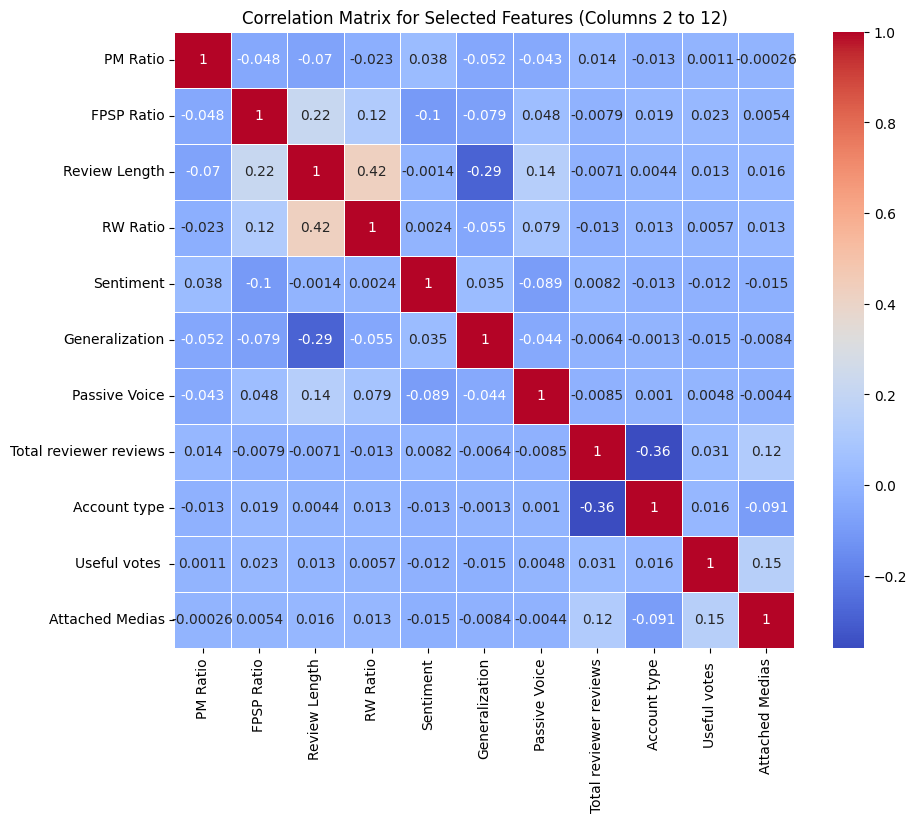

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Matrix for Selected Features (Columns 2 to 12)')
plt.show()

In [ ]:
pip install pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('Final_dataset.xlsx')


# Exclude the first column (text) and use columns 2 to the second-to-last column for features
X = df.iloc[:, 1:-1]  # Features (excluding the first column for text)
y = df.iloc[:, -1]    # Labels (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store accuracy results
results = {}

# Train each model and calculate accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[model_name] = accuracy * 100  # Store accuracy as percentage

# Print the results
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Naive Bayes': 75.02327746741155, 'KNN': 73.69646182495345, 'Decision Tree': 97.27653631284916, 'Logistic Regression': 85.63780260707635, 'Random Forest': 97.76536312849163}


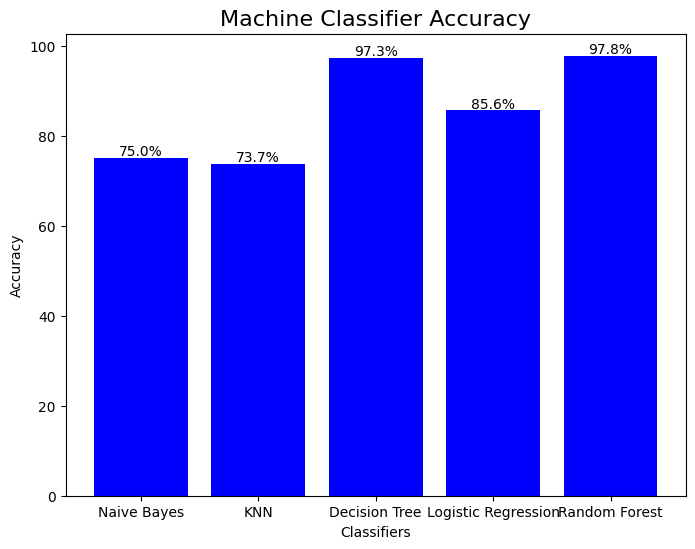

In [ ]:
import matplotlib.pyplot as plt

# Extract the model names and their corresponding accuracy
model_names = list(results.keys())
accuracy_scores = list(results.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color='blue')

# Add titles and labels
plt.title('Machine Classifier Accuracy', fontsize=16)
plt.xlabel('Classifiers', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)

# Show the values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

# Display the plot
plt.show()


In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_excel('Final_dataset.xlsx')

# Exclude the first column (text) and use columns 2 to the second-to-last column for features
X = df.iloc[:, 1:-1]  # Features (excluding the first column for text)
y = df.iloc[:, -1]    # Labels (last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE (Optional)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
Label
1    10092
0    10092
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the models
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='linear'),  # SVM with linear kernel
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store accuracy results
results = {}

# Train each model and calculate accuracy using the resampled training set
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model on resampled data
    y_pred = model.predict(X_test)  # Make predictions on the original test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[model_name] = accuracy * 100  # Store accuracy as percentage

# Print the results
print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Naive Bayes': 72.18342644320298, 'KNN': 71.08938547486034, 'SVM': 84.93947858472998, 'Logistic Regression': 84.4972067039106, 'Random Forest': 98.1610800744879}


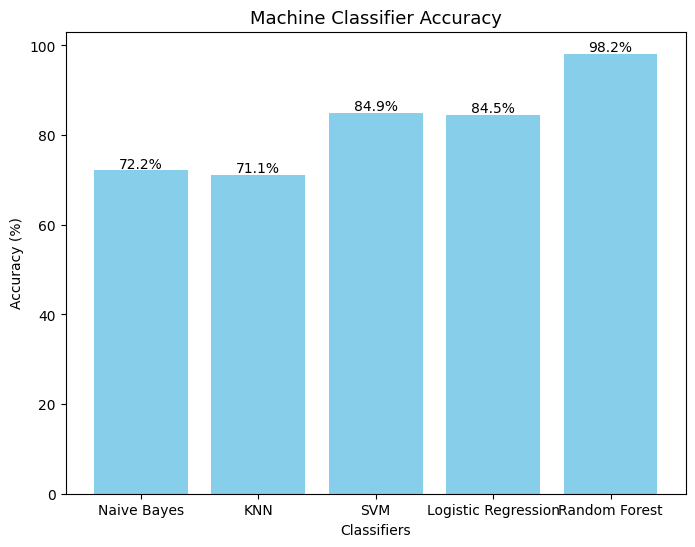

In [ ]:
import matplotlib.pyplot as plt

# Extract the model names and their corresponding accuracy
model_names = list(results.keys())
accuracy_scores = list(results.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')

# Add titles and labels
plt.title('Machine Classifier Accuracy', fontsize=13)
plt.xlabel('Classifiers', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)

# Show the values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10)

# Display the plot
plt.show()
